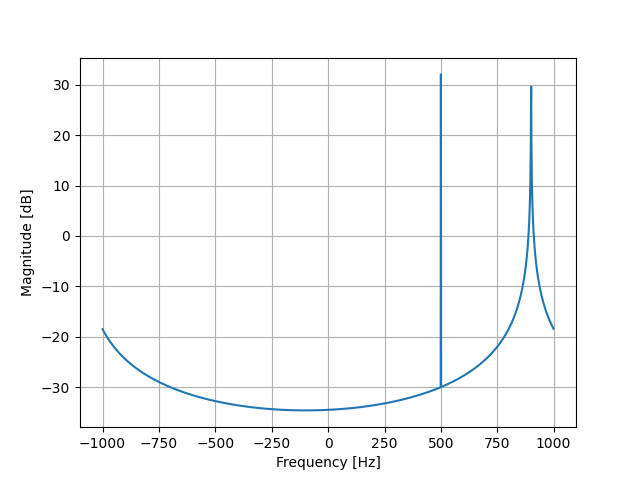

In [15]:
import numpy as np
from scipy.linalg import toeplitz
from scipy.fftpack import fft, ifft

import numpy as np
import matplotlib.pyplot as plt


Fs = 2000 # sample rate
Ts = 1/Fs # sample period
N = 2048 # number of samples to simulate

t = Ts*np.arange(N)

X = 40 * np.exp(1j*2*np.pi*500*t) # simulates sinusoid at 50 Hz

Y = 40 * np.exp(1j*2*np.pi*900*t) # simulates sinusoid at 900 Hz


r = X+Y

#r = x 
PSD = (np.abs(np.fft.fft(r))/N)**2
PSD_log = 10.0*np.log10(PSD)
PSD_shifted = np.fft.fftshift(PSD_log)

f = np.arange(Fs/-2.0, Fs/2.0, Fs/N) # start, stop, step


plt.plot(f, PSD_shifted)
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude [dB]")
plt.grid(True)
plt.show()





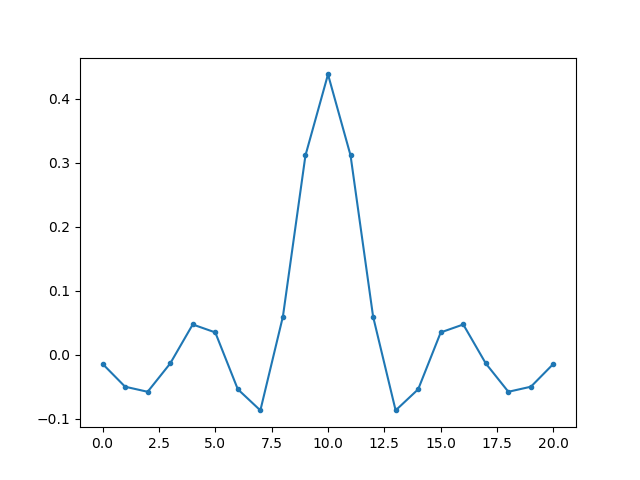

In [16]:
h = [   -0.013913258285709223,
  -0.04960329765413793,
  -0.057532588430626384,
  -0.01339002976910425,
  0.04750743504809335,
  0.03513027318724902,
  -0.05360176693944051,
  -0.0865916350741218,
  0.05985974677683547,
  0.31136044670927265,
  0.4378104462315683,
  0.31136044670927265,
  0.05985974677683547,
  -0.0865916350741218,
  -0.05360176693944051,
  0.03513027318724902,
  0.04750743504809335,
  -0.01339002976910425,
  -0.057532588430626384,
  -0.04960329765413793,
  -0.013913258285709223
    ]

# plot the impulse response
plt.figure('impulse')
plt.plot(h, '.-')
plt.show()

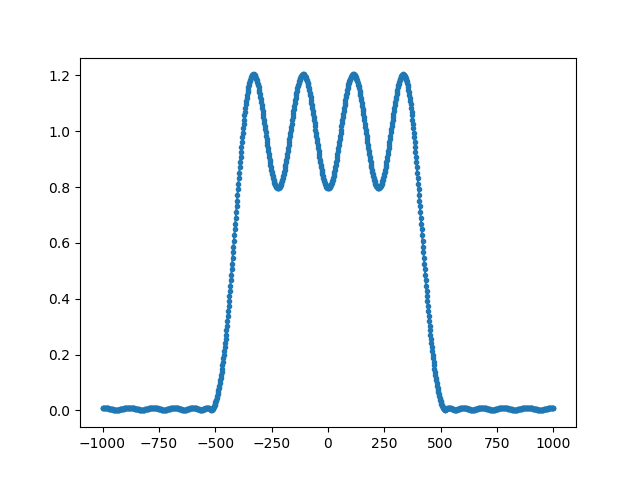

In [17]:
sample_rate = Fs
# plot the frequency response
H = np.abs(np.fft.fft(h, 1024)) # take the 1024-point FFT and magnitude
H = np.fft.fftshift(H) # make 0 Hz in the center
w = np.linspace(-sample_rate/2, sample_rate/2, len(H)) # x axis
plt.figure('freq')
plt.plot(w, H, '.-')
plt.show()

In [18]:
h_After =   np.convolve( r ,h)
h_After


array([-1.11306066+0.j        , -3.43897201-0.72850766j,
       -2.60929766-2.27014206j, ...,  1.2445901 +1.21347078j,
       -0.43773581+0.90822727j, -0.32712032+0.10628784j])

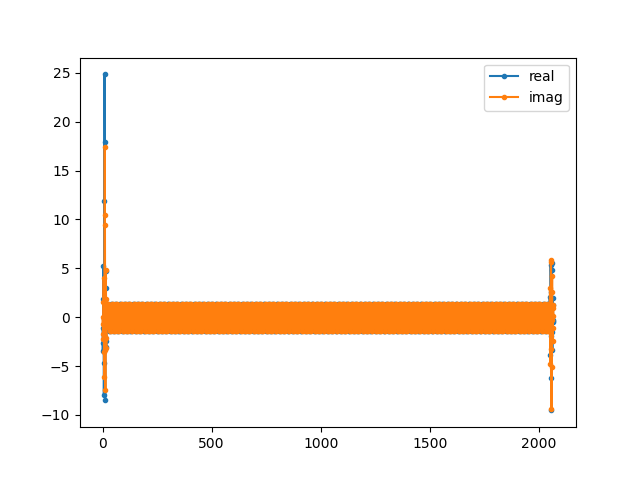

In [19]:

# plot impulse response
plt.figure('impulse')
plt.plot(np.real(h_After), '.-')
plt.plot(np.imag(h_After), '.-')
plt.legend(['real', 'imag'], loc=1)
plt.show()


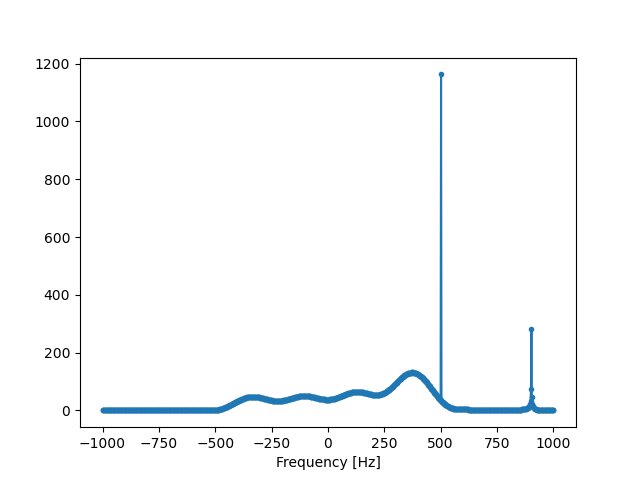

In [20]:
# plot the frequency response
H_after = np.abs(np.fft.fft(h_After, 1024)) # take the 1024-point FFT and magnitude
H_after = np.fft.fftshift(H_after) # make 0 Hz in the center
w = np.linspace(-sample_rate/2, sample_rate/2, len(H)) # x axis
plt.figure('freq')
plt.plot(w, H_after, '.-')
plt.xlabel('Frequency [Hz]')
plt.show()